In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

import cv2
from PIL import Image
import numpy as np
import random
import tqdm
import matplotlib.pyplot as plt

from tokenizer.directsam import DirectSAMTokenizer
from utils.visualization import visualize_masks

/home/dchenbs/anaconda3/envs/univlm/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
image_dir = '/home/dchenbs/workspace/datasets/coco2017/images/val2017'

# image_dir = '/home/dchenbs/workspace/datasets/Adobe_EntitySeg/images/entity_01_11580'
# image_dir = '/home/dchenbs/workspace/datasets/Adobe_EntitySeg/images/entity_02_11598'
# image_dir = '/home/dchenbs/workspace/datasets/Adobe_EntitySeg/images/entity_03_10049'
# image_dir = '/home/dchenbs/workspace/datasets/CLEVR_v1.0/images/test'
# image_dir =  '/home/dchenbs/workspace/datasets/sa1b/sa_000001'
# image_dir =  '/home/dchenbs/workspace/subobjects-dev/assets/examples'

# walk through the image_dir and get all the image paths
image_paths = []
for root, dirs, files in os.walk(image_dir):
    for file in files:
        if file.endswith('.jpg') or file.endswith('.png'):
            image_paths.append(os.path.join(root, file))

print(len(image_paths))

5000


In [3]:
image_resolution = 1024

visual_tokenizer = DirectSAMTokenizer(
    ckpt="chendelong/DirectSAM-tiny-distilled-30ep-plus-50ep-1024px-0910",
    threshold=0.1,
    image_resolution=image_resolution,
    device="cuda"
)

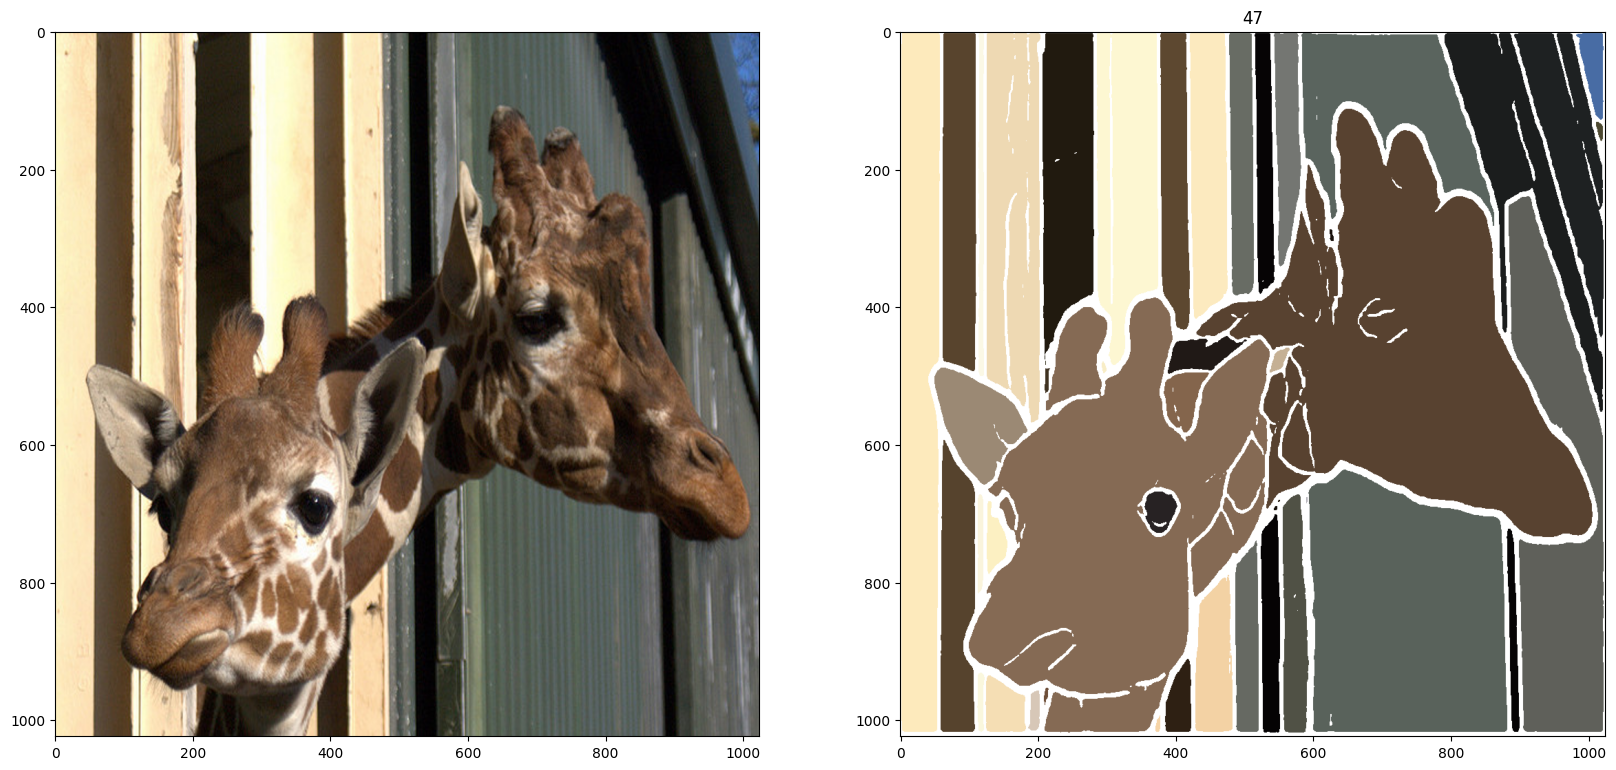

In [4]:
image_path = random.choice(image_paths)
image = Image.open(image_path).resize((image_resolution, image_resolution))
batch_masks = visual_tokenizer(image)


plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.imshow(image)

plt.subplot(1, 2, 2)
plt.imshow(visualize_masks(image, batch_masks[0][:64]))
plt.title(len(batch_masks[0]))
plt.show()